<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/OCEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam
     

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import asarray
import h5py
folder = '/content/drive/MyDrive/OCEAN/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('BACHTUOC'):
    output = 0
  if file.startswith('CADUOI'):
    output = 1
  if file.startswith('CAHE'):
    output = 2
  if file.startswith('CANGUA'):
    output = 3
  if file.startswith('CANHCUT'):
    output = 4
  if file.startswith('CAVOI'):
    output = 5
  if file.startswith('CUA'):
    output = 6
  if file.startswith('RUABIEN'):
    output = 7
  if file.startswith('SAOBIEN'):
    output = 8
  if file.startswith('SUA'):
    output = 9
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/OCEAN/OCEAN_PHOTOS', photos)
save('/content/drive/MyDrive/OCEAN/OCEAN_LABELS', labels)

(10468, 128, 128, 3) (10468,)


In [4]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/OCEAN/OCEAN_PHOTOS.npy')
labels = np.load('/content/drive/MyDrive/OCEAN/OCEAN_LABELS.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [5]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (2,2), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (2,2), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                    

In [6]:
x_train.shape

(8374, 128, 128, 3)

In [7]:
y_train.shape

(8374, 10)

In [8]:
# Training
batch_size= 16
epochs= 80   

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)
eval = model.evaluate(x_test, y_test)
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Epoch 1/80
524/524 [==============================] - 17s 10ms/step - loss: 1.6603 - accuracy: 0.3857
Epoch 2/80
524/524 [==============================] - 5s 9ms/step - loss: 1.1754 - accuracy: 0.5816
Epoch 3/80
524/524 [==============================] - 5s 10ms/step - loss: 1.0717 - accuracy: 0.6127
Epoch 4/80
524/524 [==============================] - 5s 10ms/step - loss: 1.0102 - accuracy: 0.6388
Epoch 5/80
524/524 [==============================] - 5s 10ms/step - loss: 0.9462 - accuracy: 0.6655
Epoch 6/80
524/524 [==============================] - 5s 9ms/step - loss: 0.8934 - accuracy: 0.6834
Epoch 7/80
524/524 [==============================] - 5s 9ms/step - loss: 0.8463 - accuracy: 0.6994
Epoch 8/80
524/524 [==============================] - 5s 10ms/step - loss: 0.8124 - accuracy: 0.7112
Epoch 9/80
524/524 [==============================] - 5s 9ms/step - loss: 0.8022 - accuracy: 0.7151
Epoch 10/80
524/524 [==============================] - 5s 10ms/step - loss: 0.7380 - accuracy:

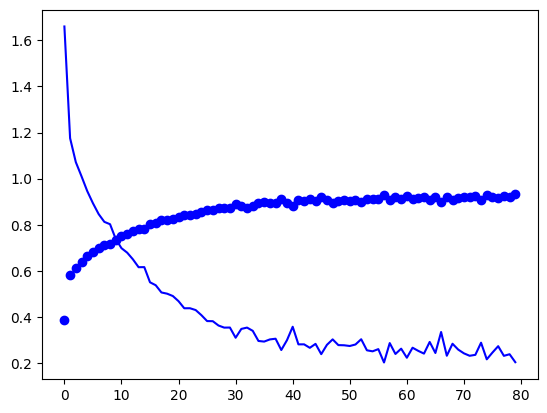

In [9]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [10]:
#Save model
model.save('/content/drive/MyDrive/OCEAN/MODEL_OCEAN2.h5')